In [ ]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
data = arff.loadarff('CEE_DATA.arff')
df = pd.DataFrame(data[0])
for line in df.columns:
  df[line]= df[line].str.decode('utf-8') 

In [ ]:
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER
664,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [ ]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

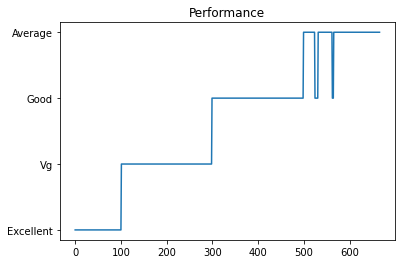

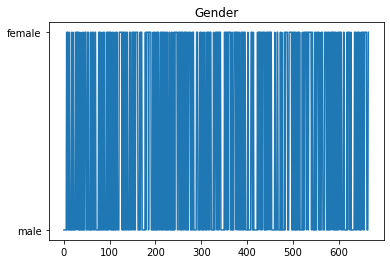

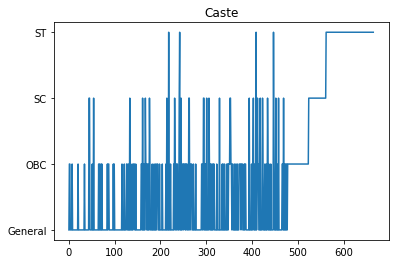

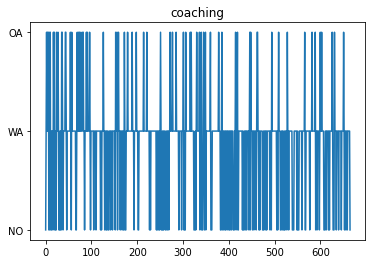

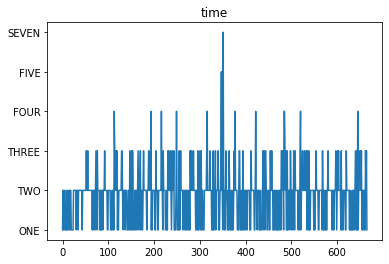

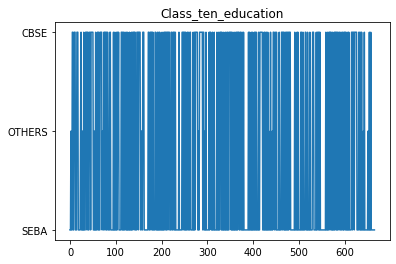

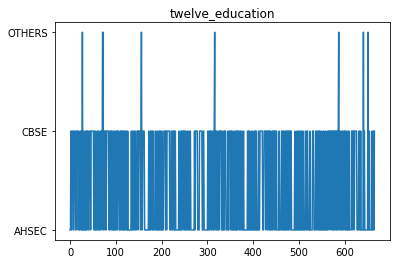

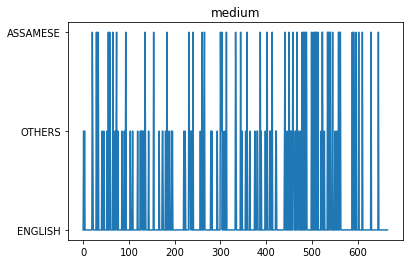

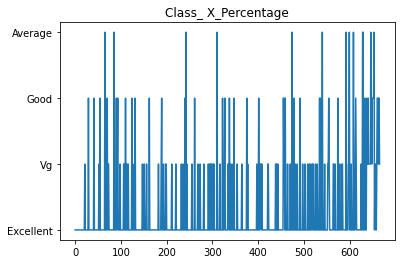

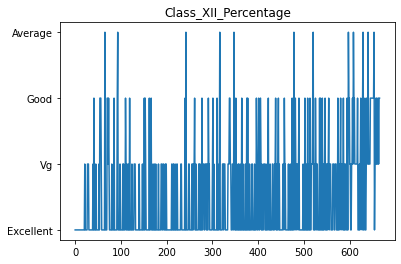

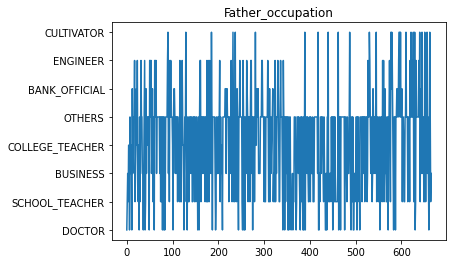

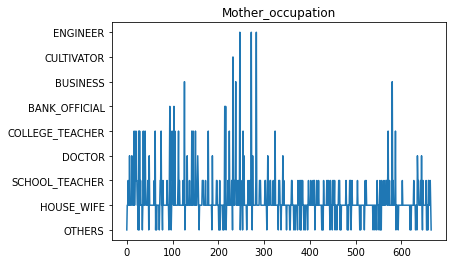

In [ ]:
for i in df.columns:
  plt.plot(df[i])
  plt.title(i)
  plt.show()

In [ ]:
df.isnull()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
661,False,False,False,False,False,False,False,False,False,False,False,False
662,False,False,False,False,False,False,False,False,False,False,False,False
663,False,False,False,False,False,False,False,False,False,False,False,False
664,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_ X_Percentage     0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64

In [ ]:
df.columns

Index(['Performance', 'Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'],
      dtype='object')

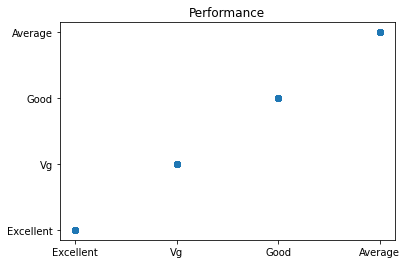

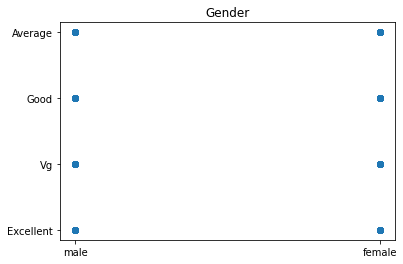

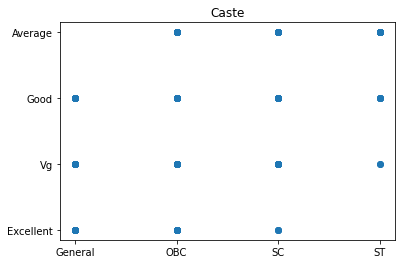

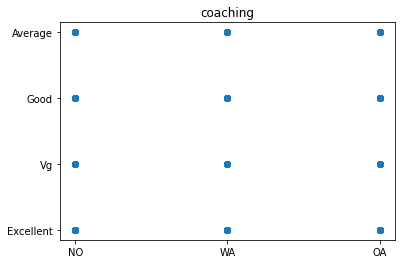

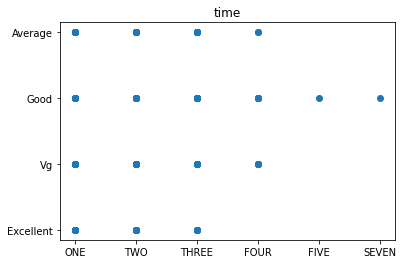

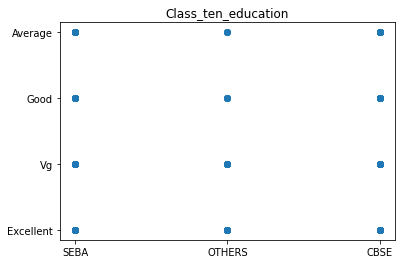

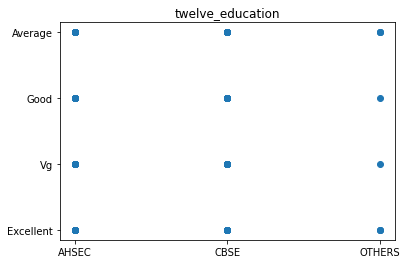

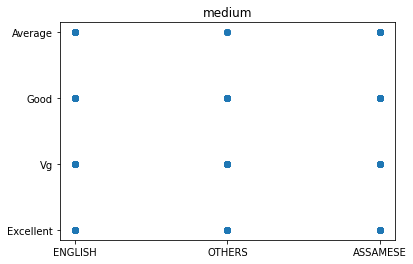

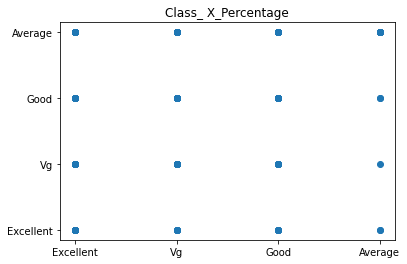

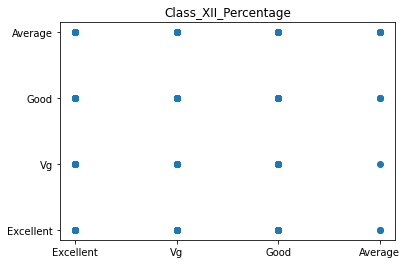

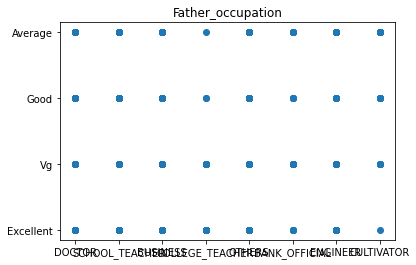

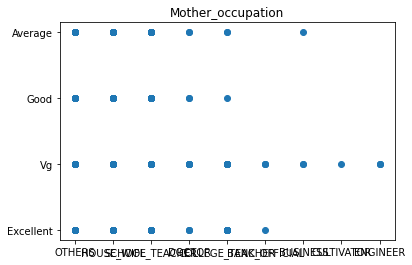

In [ ]:
for i in df.columns:
  plt.scatter(df[i].values,df['Performance'].values)
  plt.title(i)
  plt.show()


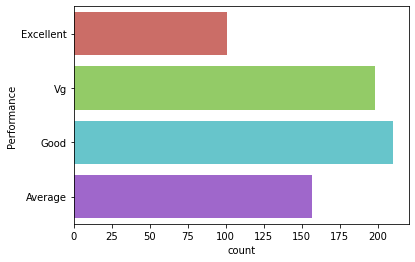

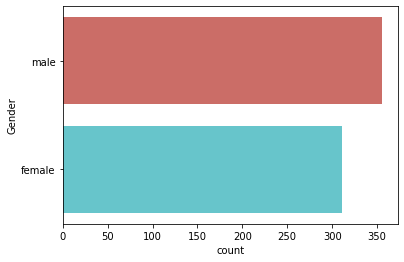

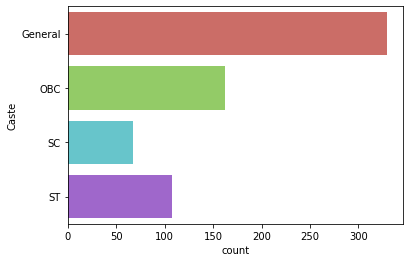

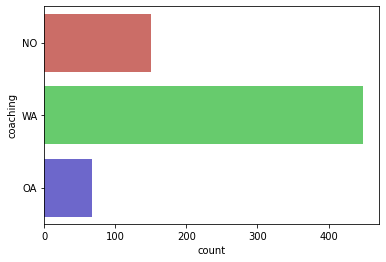

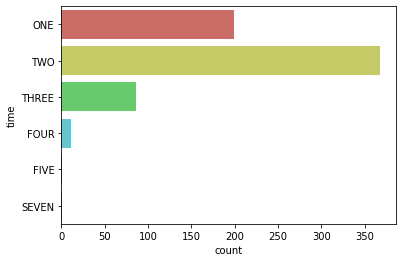

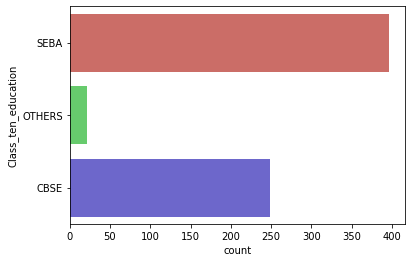

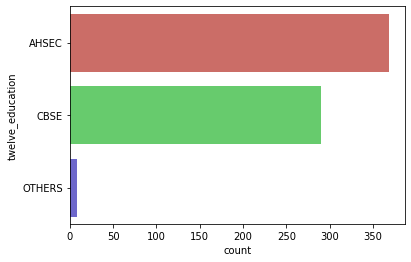

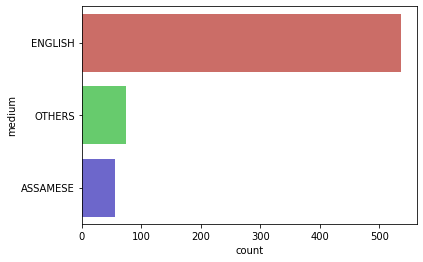

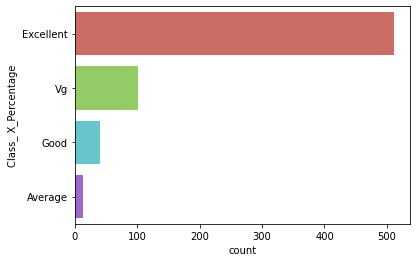

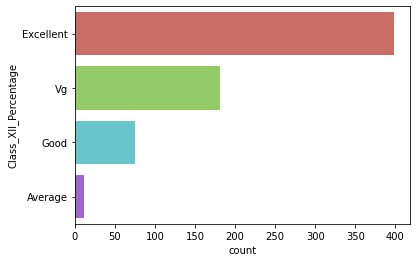

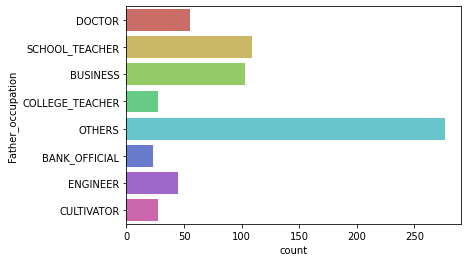

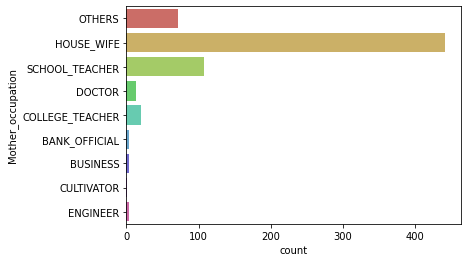

In [ ]:
for i in df.columns:
  sns.countplot(y=df[i],data=df, palette='hls')
  plt.show()

In [ ]:
df.drop_duplicates()
'''df.drop_duplicates(subset =['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'], keep = False, inplace = True)'''

df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER
664,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [ ]:
df.to_csv('classes.csv',index=False,header=True)

In [ ]:
df

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
661,Average,female,ST,WA,ONE,SEBA,AHSEC,ENGLISH,Good,Vg,OTHERS,HOUSE_WIFE
662,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Vg,Good,CULTIVATOR,HOUSE_WIFE
663,Average,male,ST,WA,TWO,SEBA,CBSE,ENGLISH,Good,Vg,OTHERS,SCHOOL_TEACHER
664,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [ ]:
df1= df.drop(columns=['time', 'medium','Gender','twelve_education','coaching','Father_occupation','Class_ten_education','Class_ X_Percentage',])
'''
data2 = pd.get_dummies(df, columns =['Gender', 'Caste', 'coaching', 'time',
       'Class_ten_education', 'twelve_education', 'medium',
       'Class_ X_Percentage', 'Class_XII_Percentage', 'Father_occupation',
       'Mother_occupation'])'''
data2 = pd.get_dummies(df1, columns =[ 'Caste', 'Class_XII_Percentage', 'Mother_occupation'])     
#data2 = pd.get_dummies(df, columns =df.columns)
data2

,Performance,Caste_General,Caste_OBC,Caste_SC,Caste_ST,Class_XII_Percentage_Average,Class_XII_Percentage_Excellent,Class_XII_Percentage_Good,Class_XII_Percentage_Vg,Mother_occupation_BANK_OFFICIAL,Mother_occupation_BUSINESS,Mother_occupation_COLLEGE_TEACHER,Mother_occupation_CULTIVATOR,Mother_occupation_DOCTOR,Mother_occupation_ENGINEER,Mother_occupation_HOUSE_WIFE,Mother_occupation_OTHERS,Mother_occupation_SCHOOL_TEACHER
0,Excellent,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,Excellent,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,Excellent,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,Excellent,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,Excellent,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Average,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
662,Average,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
663,Average,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
664,Average,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
#1:'Excellent,3:'Vg',2:'Good',0:'Average'
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data2['Performance']=lb.fit_transform(data2['Performance'])
for i in data2.iloc[:101,0]:
  if i!=1:
    print('False')
for i in data2.iloc[101:298,0]:
  if i!=3:
    print('False')
for i in data2.iloc[299:498,0]:
  if i!=2:
    print('False')
for i in data2.iloc[499:524,0]:
  if i!=0:
    print('False')

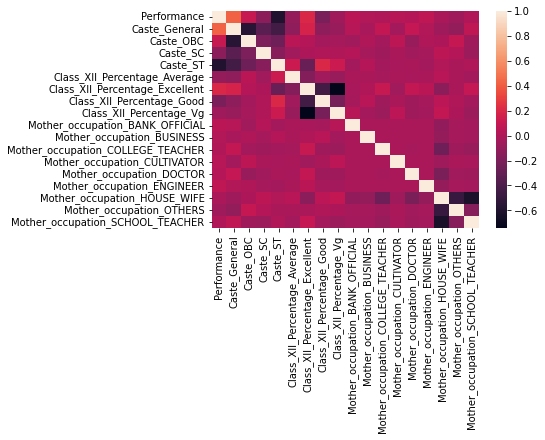

In [ ]:
sns.heatmap(data2.corr())
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(532, 17)

In [ ]:
X_train

,Caste_General,Caste_OBC,Caste_SC,Caste_ST,Class_XII_Percentage_Average,Class_XII_Percentage_Excellent,Class_XII_Percentage_Good,Class_XII_Percentage_Vg,Mother_occupation_BANK_OFFICIAL,Mother_occupation_BUSINESS,Mother_occupation_COLLEGE_TEACHER,Mother_occupation_CULTIVATOR,Mother_occupation_DOCTOR,Mother_occupation_ENGINEER,Mother_occupation_HOUSE_WIFE,Mother_occupation_OTHERS,Mother_occupation_SCHOOL_TEACHER
242,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
516,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
315,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
140,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
231,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
359,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
629,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_train

242    3
516    0
315    2
140    3
231    3
      ..
9      1
359    2
192    3
629    0
559    0
Name: Performance, Length: 532, dtype: int64

In [ ]:
classifier = LogisticRegression(random_state=0,multi_class='ovr',solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
classifier.score(X_test, y_test)

0.5

array([[27,  0,  7,  0],
       [ 1,  0,  4, 19],
       [ 4,  0, 18, 18],
       [ 2,  0, 12, 22]])

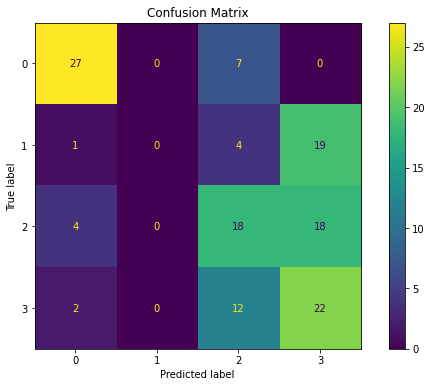

In [ ]:
#Creating matplotlib axes object to assign figuresize and figure title
from sklearn import metrics
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

disp = metrics.plot_confusion_matrix(classifier, X_test, y_test, ax = ax)
disp.confusion_matrix

In [ ]:
y_test

578    0
310    2
14     1
540    0
76     1
      ..
553    0
582    0
187    3
508    0
101    3
Name: Performance, Length: 134, dtype: int64

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


In [ ]:
from sklearn.metrics import classification_report
y_pred=classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.00      0.00      0.00        24
           2       0.44      0.45      0.44        40
           3       0.37      0.61      0.46        36

    accuracy                           0.50       134
   macro avg       0.40      0.46      0.43       134
weighted avg       0.43      0.50      0.46       134



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from scipy.stats import chi2_contingency
for j in df.columns[1:]:
  for i in df.columns[1:]:
    if i!=j:
      crossTab = pd.crosstab(index = df[i],columns = df[j])
      chisq_result = chi2_contingency(crossTab ,correction=True)
      if chisq_result[1] > 0.1:
        print("P-value between  ",i+':'+j+'='+str(chisq_result[1]))


P-value between   Caste:Gender=0.26592697881757427
P-value between   time:Gender=0.6506077494464095
P-value between   Class_ten_education:Gender=0.1489464578941721
P-value between   twelve_education:Gender=0.6594214159304341
P-value between   Gender:Caste=0.26592697881757477
P-value between   coaching:Caste=0.8859985897241105
P-value between   time:Caste=0.2526711772433467
P-value between   Class_ten_education:Caste=0.5293228746458492
P-value between   twelve_education:Caste=0.12348910354297594
P-value between   Caste:coaching=0.8859985897241105
P-value between   Father_occupation:coaching=0.27192884265117706
P-value between   Mother_occupation:coaching=0.8099533819846461
P-value between   Gender:time=0.6506077494464095
P-value between   Caste:time=0.2526711772433467
P-value between   Class_ten_education:time=0.25083129830205614
P-value between   twelve_education:time=0.15345203366088744
P-value between   Gender:Class_ten_education=0.1489464578941722
P-value between   Caste:Class_ten_e